druhý obraz má červené body
barevný prostor tak abych mohl dělat segmentaci
chci ho bez morfologických operací

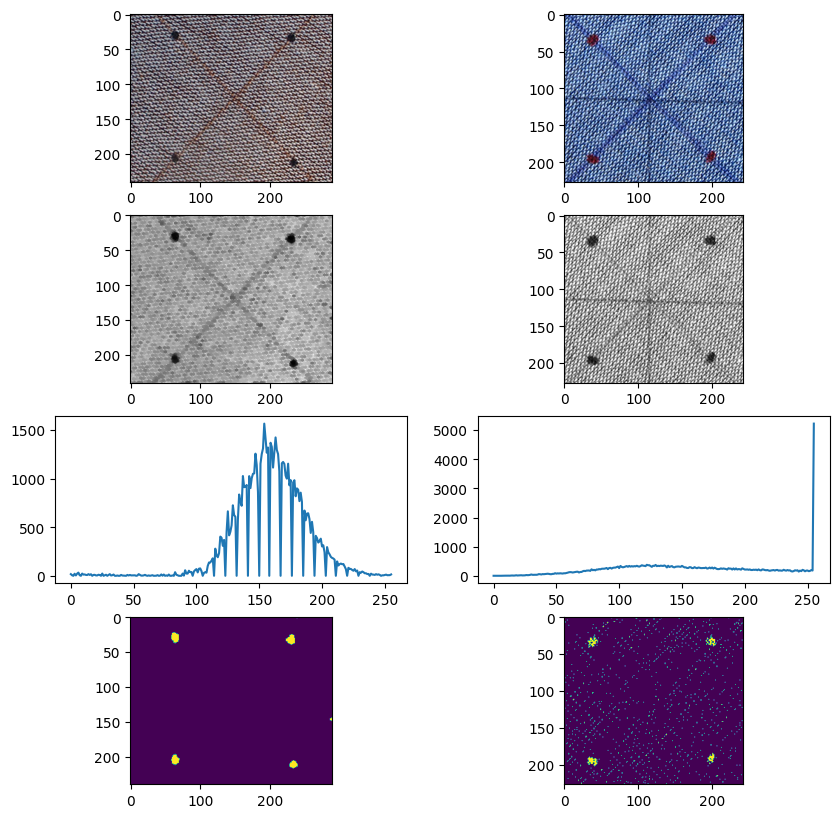

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

cv08_im1 = cv2.imread("cv08_im1.bmp")
cv08_im2 = cv2.imread("cv08_im2.bmp")


def image_color_segmentation(img, threshold):
    """
    param img: input image

    """
    # extract the color channels
    img = img.astype(np.float32)
    background = img

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if background[i, j] >= threshold:
                img[i, j] = 0
            else:
                img[i, j] = 255

    plt.imshow(img)


def dilatation(img):
    """
    param img: input image
    """
    # kernel ring shape 6x6
    kernel = np.array([
        [0, 0, 0, 1, 0, 0],
        [0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1],
    ])
    img_dilation = cv2.dilate(img, kernel, iterations=1)
    return img_dilation


def erosion(img):
    """
    param img: input image
    """
    # kernel ring shape 6x6
    kernel = np.array([
        [0, 0, 0, 1, 0, 0],
        [0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1],
    ])
    img_erosion = cv2.erode(img, kernel, iterations=1)
    return img_erosion


def opening(img):
    """
    param img: input image
    """
    # kernel ring shape 6x6
    kernel = np.array([
        [0, 0, 0, 1, 0, 0],
        [0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1],
    ])
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    return img_opening


def closing(img):
    """ """
    # kernel ring shape 6x6
    # kernel = np.array([
    #     [0, 0, 0, 1, 0, 0],
    #     [0, 1, 1, 1, 1, 1],
    #     [1, 1, 1, 1, 1, 1],
    #     [1, 1, 1, 1, 1, 1],
    #     [1, 1, 1, 1, 1, 1],
    #     [0, 1, 1, 1, 1, 1],
    # ])
    
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    return img_closing


def img_to_gray(img):
    """
    param img: input image
    return: gray image
    """
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


plt.figure(figsize=(10, 10))
plt.subplot(4, 2, 1)
plt.imshow(cv08_im1)
plt.subplot(4, 2, 2)
plt.imshow(cv2.cvtColor(cv08_im2, cv2.COLOR_BGR2RGB))
plt.subplot(4, 2, 3)
cv08_im1=img_to_gray(cv08_im1)
cv08_im1 = closing(cv08_im1)
plt.imshow(cv08_im1, cmap="gray")
plt.subplot(4, 2, 4)
cv08_im2_blue = cv08_im2[:, :, 0]
plt.imshow(cv08_im2_blue, cmap="gray")
plt.subplot(4, 2, 5)
plt.plot(np.histogram(cv08_im1, bins=256)[0])
plt.subplot(4, 2, 6)
plt.plot(np.histogram(cv08_im2_blue, bins=256)[0])

plt.subplot(4, 2, 7)
seg_cv08_im1 = image_color_segmentation(cv08_im1, 100)

plt.subplot(4, 2, 8)
seg_cv08_im1 = image_color_segmentation(cv08_im2_blue, 50)
